# Análise de doenças cardíacas

# Definição do problema

O objetivo primário deste projeto consiste em, dado um conjunto de dados contendo o histórico médico de pacientes com e sem doença cardíaca, é possível determinar, através destes dados se um paciente terá ou não doença cardíaca?

O objetivo secundário é utilizar técnicas de análise de dados, bem como análise exploratória, e técnicas de aprendizado de máquina para construir um modelo preditivo que atenda ao objetivo primário.

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'winter_r'

# Análise exploratória

Começando pela leitura do arquivo de dados:

In [180]:
df = pd.read_csv('./heart-disease.csv')

display(df.head(3), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


None

Com a leitura do arquivo `*.csv` é possível verificar que todos os dados já estão tratados de forma numérica. Não há valores nulos nem faltantes.

## Dicionário de atributos

Como os dados já estão limpos, entendamos o significado de cada atributo:

* `age`: idade, em anos
* `sex`: sexo. 1 = masculino, 2 = feminino
* `cp`: tipo de dor no peito. medido como intensidade, de 0 a 3
* `trestbps`: pressão sanguínea do paciente em estado "descansado". medido em mmHg
* `chol`: Nível de colesterol: 
* `fbs`: nível de açúcar no sangue em jejum. Medido de forma binária (0 -> nível menor que 120mg/dl; 1 -> caso contrário). 1 pode indicar diabetes
* `restecg`: resultado do eletrocardiograma do paciente descansado. Medido em 0,1,2.
  * Não há informação do que significam esses 3 níveis
* `thalach`: Maior ritmo cardíaco alcançado em BPM
* `exang`: Exercício introduziu angina? Em outras palavras, se o exercício introduziu dor no peito.
* `oldpeak` = Valor máximo do pico negativo no eletrocardiograma. Mede o quão "anormal" o coração contrai abaixo da linha mínima de contração no eletrocardiograma.
* `slope`: inclinação do oldpeak (0 -> inclinação positiva, 1-> inclinação nula, -> inclinação negativa).
* `ca`: número de vasos sanguíneos coloridos por fluoroscopia. (0 a 3).
* `thal`: Inconclusivo. 3 -> normal, 6 -> defeito corrigido, 7 -> defeito com possibilidade de correção
* `target`: se a pessoa tem ou não problemas cardíacos

## Hipóteses

Com um conhecimento básico dos dados, perguntam-se quais os atributos contribuem positiva ou negativamente para o paciente possuir doenças cardíacas:

1. A idade e sexo são relevantes?
2. Atributos como dor no peito e angina causada por exercício são fatores?

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

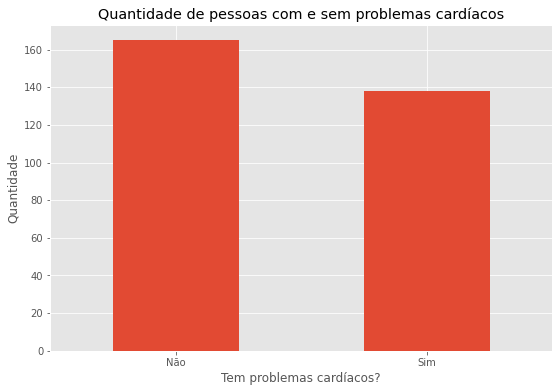

In [181]:
_, ax = plt.subplots(figsize=(9, 6))
df['target'].value_counts().plot(kind='bar', ax=ax,)
ax.set(
  title='Quantidade de pessoas com e sem problemas cardíacos',
  ylabel='Quantidade',
  xlabel='Tem problemas cardíacos?')
ax.set_xticklabels(['Não', 'Sim'], rotation=0)

Com o gráfico acima é possível inferir que os dados estão bem distribuídos entre pessoas com e sem doenças cardíacas

[Text(0, 0, 'Feminino'), Text(1, 0, 'Masculino')]

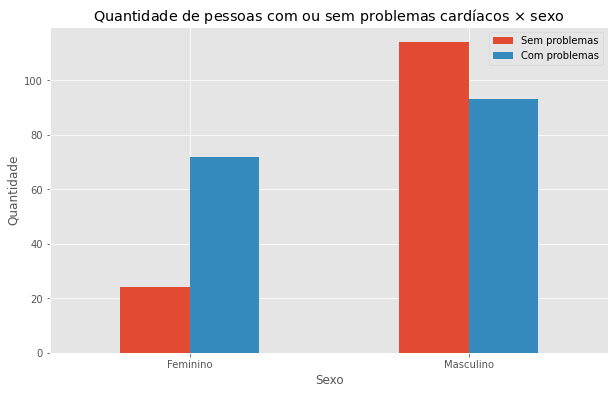

In [182]:
_, ax = plt.subplots(figsize=(10,6))
pd.crosstab(df['sex'], df['target']).plot(kind='bar', ax=ax)
ax.set(title=r'Quantidade de pessoas com ou sem problemas cardíacos $\times$ sexo',
       ylabel='Quantidade',
       xlabel='Sexo')
ax.legend(['Sem problemas', 'Com problemas'])
ax.set_xticklabels(['Feminino', 'Masculino'], rotation=0)



[Text(0.5, 1.0, 'Distribuição de idade'),
 Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Quantidade')]

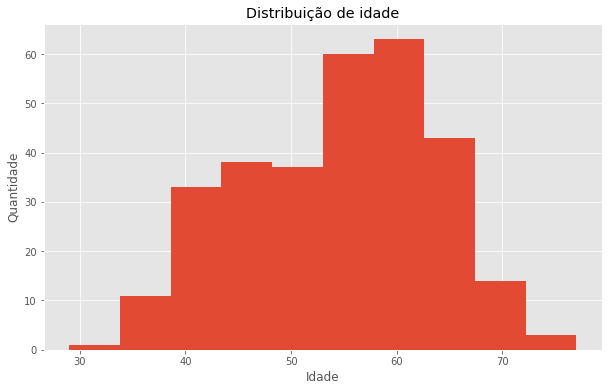

In [183]:
_, ax = plt.subplots(figsize=(10,6))
ax.hist(df['age'], bins=10)
ax.set(
  title=r'Distribuição de idade',
  xlabel='Idade',
  ylabel='Quantidade'
)

[Text(0, 0, 'Sem problemas'), Text(1, 0, 'Com problemas')]

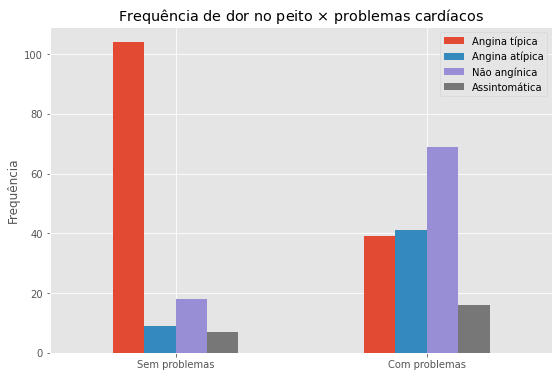

In [184]:
_, ax = plt.subplots(figsize=(9,6))
pd.crosstab(df['target'], df['cp']).plot(kind='bar', ax=ax)
ax.set(
  title=r'Frequência de dor no peito $\times$ problemas cardíacos',
  xlabel=None,
  ylabel ='Frequência',
)
ax.legend([
    'Angina típica',
    'Angina atípica',
    'Não angínica',
    'Assintomática'])

ax.set_xticklabels(['Sem problemas', 'Com problemas'], rotation=0)

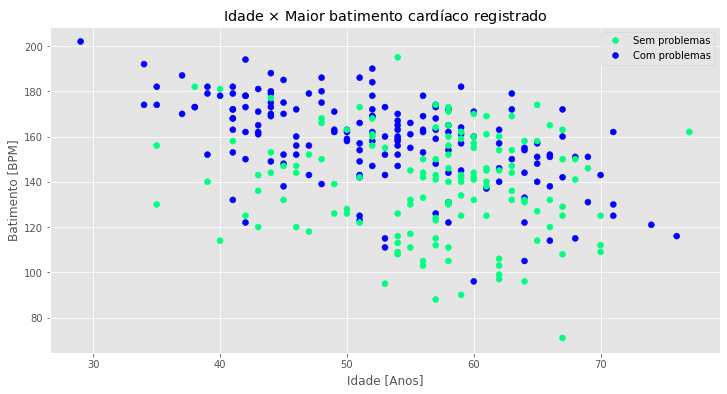

In [185]:
_, ax = plt.subplots(figsize=(12,6))

sc = ax.scatter(
  x=df['age'],
  y=df['thalach'],
  c=df['target'],
)
ax.set(
  title=r'Idade $\times$ Maior batimento cardíaco registrado',
  ylabel='Batimento [BPM]',
  xlabel='Idade [Anos]'
)
ax.legend(handles=sc.legend_elements()[0], labels=['Sem problemas', 'Com problemas'])

<AxesSubplot:>

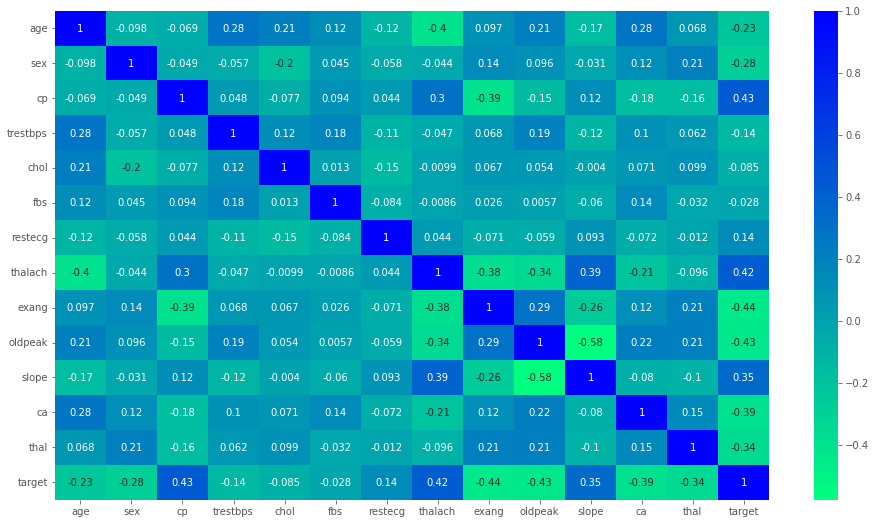

In [186]:
corr_mat = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(
  corr_mat,
  annot=True,
  cmap='winter_r'
)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(6)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

In [207]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(max_iter=1000)
clf_2.fit(X_train, y_train)
clf_2.score(X_test, y_test)

0.8360655737704918